# Modelos de Machine Learning

## Importación de librerías

In [ ]:
# Importación de librerías en caso se utilice el código en Google Collab
from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive
from textblob import TextBlob

import textblob
drive.mount('/content/drive')


In [2]:
#Librería para el manejo de directorio y archivos
import glob
import random, os, sys
import ntpath
import warnings
warnings.filterwarnings('ignore')

# Librería para el manejo de datos
import pandas as pd
import numpy as np

#Gráfico de datos
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
## Modelo de CNN+LSTM
# import models

## Otros clasificadores
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
## Includes
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer


## Train Test Split
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

## Métricas
from sklearn.metrics import make_scorer, f1_score, accuracy_score, classification_report, log_loss
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

## Over sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN

from collections import Counter

# Parallel Jobs

import joblib
from joblib import dump, load

## Lectura de datos

In [4]:
# Recolección de datos de fase anterior
project_path = os.path.abspath(os.getcwd()) 
df=pd.read_excel(project_path+'/Data_final.xlsx')
df=pd.concat([df,pd.read_excel(project_path+'/Data_final2.xlsx')],ignore_index=True)
df

,epoch,condition,DFA,Hurst Exponent,HFF,Fisher Info,SVD Entropy,PSD,PFD,Hjorth
0,0,Sleep stage W,0.837485,0.400955,0.658111,2.041313,2.041313,"(array([323795.99695792, 95106.76188001, 577...",0.550561,"(0.006943341407304602, 231.09225093269163)"
1,1,Sleep stage W,0.998604,0.430684,0.646741,1.983289,1.983289,"(array([392143.14146414, 110272.8196683 , 606...",0.549353,"(0.005894518787862921, 270.7564541726673)"
2,2,Sleep stage W,0.897386,0.465226,0.464066,1.928401,1.928401,"(array([483994.10157561, 128847.0274195 , 628...",0.555576,"(0.004584420837369226, 328.7663937035511)"
3,3,Sleep stage W,0.890133,0.393192,0.652857,2.025418,2.025418,"(array([423796.5413977 , 112940.25357168, 671...",0.549887,"(0.006978667292068013, 232.3983769951106)"
4,4,Sleep stage W,1.024876,0.615532,0.630969,1.966106,1.966106,"(array([401737.29188169, 103449.05468694, 707...",0.550386,"(0.005744621959527253, 279.12813226835925)"
...,...,...,...,...,...,...,...,...,...,...
84307,879,Sleep stage W,0.955407,0.687106,0.601224,1.959786,1.959786,"(array([573454.48566983, 130816.5279916 , 884...",0.555781,"(0.006626887963179141, 251.16747537039464)"
84308,880,Sleep stage W,0.953700,0.528094,0.509663,1.920730,1.920730,"(array([690929.53021755, 136638.86420592, 1035...",0.558980,"(0.0052168959877767805, 301.2904203684975)"
84309,881,Sleep stage W,1.091841,0.550011,0.554545,1.858709,1.858709,"(array([561455.25609375, 102920.77964855, 843...",0.557062,"(0.004440653148720743, 350.2606857634488)"
84310,882,Sleep stage W,1.059512,0.717801,0.511750,1.888685,1.888685,"(array([555710.68851866, 120112.08409237, 917...",0.556876,"(0.004237847194728936, 350.8208114356323)"


## Separación de features

In [5]:
df[['Power Delta','Power Theta','Power Alpha','Power Beta',
   'Power Delta Normalized','Power Theta Normalized','Power Alpha Normalized','Power Beta Normalized']]      =    df.PSD.str.split(',',expand=True)
df.drop('PSD',inplace=True,axis=1)

In [6]:
df['Power Delta']=df['Power Delta'].str.strip()
df['Power Delta Normalized']=df['Power Delta Normalized'].str.strip()
df['Power Beta']=df['Power Beta'].str.strip()
df['Power Beta Normalized']=df['Power Beta Normalized'].str.strip()

df['Power Delta']=df['Power Delta'].str.replace("(array([",'')
df['Power Delta Normalized']=df['Power Delta Normalized'].str.replace("array([",'')

df['Power Beta']=df['Power Beta'].str.replace('])','')
df['Power Beta Normalized']=df['Power Beta Normalized'].str.replace(']))','')

df['Power Delta']=df['Power Delta'].astype(float)
df['Power Delta Normalized']=df['Power Delta Normalized'].astype(float)
df['Power Beta']=df['Power Beta'].astype(float)
df['Power Beta Normalized']=df['Power Beta Normalized'].astype(float)

df[['Hjorth Mobility','Hjorth Complexity']]      =    df.Hjorth.str.split(',',expand=True)

df['Hjorth Mobility']=df['Hjorth Mobility'].str.replace("(",'')
df['Hjorth Complexity']=df['Hjorth Complexity'].str.replace(")",'')


df['Hjorth Mobility']=df['Hjorth Mobility'].astype(float)
df['Hjorth Complexity']=df['Hjorth Complexity'].astype(float)

df.drop(['Hjorth'],inplace=True,axis=1)

df

,epoch,condition,DFA,Hurst Exponent,HFF,Fisher Info,SVD Entropy,PFD,Power Delta,Power Theta,Power Alpha,Power Beta,Power Delta Normalized,Power Theta Normalized,Power Alpha Normalized,Power Beta Normalized,Hjorth Mobility,Hjorth Complexity
0,0,Sleep stage W,0.837485,0.400955,0.658111,2.041313,2.041313,0.550561,323795.996958,95106.76188001,57775.40616709,147590.522157,0.518680,0.15234908,0.09254894,0.236421,0.006943,231.092251
1,1,Sleep stage W,0.998604,0.430684,0.646741,1.983289,1.983289,0.549353,392143.141464,110272.8196683,60610.58585452,147630.579355,0.551804,0.15517022,0.08528809,0.207738,0.005895,270.756454
2,2,Sleep stage W,0.897386,0.465226,0.464066,1.928401,1.928401,0.555576,483994.101576,128847.0274195,62851.20521658,131960.880380,0.599260,0.15953261,0.07781954,0.163388,0.004584,328.766394
3,3,Sleep stage W,0.890133,0.393192,0.652857,2.025418,2.025418,0.549887,423796.541398,112940.25357168,67194.8481331,181349.309617,0.539675,0.14382146,0.08556791,0.230936,0.006979,232.398377
4,4,Sleep stage W,1.024876,0.615532,0.630969,1.966106,1.966106,0.550386,401737.291882,103449.05468694,70702.95559783,159968.475115,0.545944,0.14058295,0.09608237,0.217390,0.005745,279.128132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84307,879,Sleep stage W,0.955407,0.687106,0.601224,1.959786,1.959786,0.555781,573454.485670,130816.5279916,88410.62364784,276106.602930,0.536546,0.12239705,0.08272043,0.258336,0.006627,251.167475
84308,880,Sleep stage W,0.953700,0.528094,0.509663,1.920730,1.920730,0.558980,690929.530218,136638.86420592,103589.53405265,256077.099645,0.581965,0.11508999,0.08725276,0.215692,0.005217,301.290420
84309,881,Sleep stage W,1.091841,0.550011,0.554545,1.858709,1.858709,0.557062,561455.256094,102920.77964855,84385.11214613,201981.698371,0.590544,0.10825302,0.08875703,0.212446,0.004441,350.260686
84310,882,Sleep stage W,1.059512,0.717801,0.511750,1.888685,1.888685,0.556876,555710.688519,120112.08409237,91701.47751394,180109.745871,0.586419,0.12674945,0.09676888,0.190063,0.004238,350.820811


## Mapeo de clases

In [7]:
event_id = {'Sleep stage W': 1,
            'Sleep stage 1': 2,
            'Sleep stage 2': 3,
            'Sleep stage 3/4': 4,
            'Sleep stage R': 5}
df.condition=df.condition.map(event_id)
df

,epoch,condition,DFA,Hurst Exponent,HFF,Fisher Info,SVD Entropy,PFD,Power Delta,Power Theta,Power Alpha,Power Beta,Power Delta Normalized,Power Theta Normalized,Power Alpha Normalized,Power Beta Normalized,Hjorth Mobility,Hjorth Complexity
0,0,1,0.837485,0.400955,0.658111,2.041313,2.041313,0.550561,323795.996958,95106.76188001,57775.40616709,147590.522157,0.518680,0.15234908,0.09254894,0.236421,0.006943,231.092251
1,1,1,0.998604,0.430684,0.646741,1.983289,1.983289,0.549353,392143.141464,110272.8196683,60610.58585452,147630.579355,0.551804,0.15517022,0.08528809,0.207738,0.005895,270.756454
2,2,1,0.897386,0.465226,0.464066,1.928401,1.928401,0.555576,483994.101576,128847.0274195,62851.20521658,131960.880380,0.599260,0.15953261,0.07781954,0.163388,0.004584,328.766394
3,3,1,0.890133,0.393192,0.652857,2.025418,2.025418,0.549887,423796.541398,112940.25357168,67194.8481331,181349.309617,0.539675,0.14382146,0.08556791,0.230936,0.006979,232.398377
4,4,1,1.024876,0.615532,0.630969,1.966106,1.966106,0.550386,401737.291882,103449.05468694,70702.95559783,159968.475115,0.545944,0.14058295,0.09608237,0.217390,0.005745,279.128132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84307,879,1,0.955407,0.687106,0.601224,1.959786,1.959786,0.555781,573454.485670,130816.5279916,88410.62364784,276106.602930,0.536546,0.12239705,0.08272043,0.258336,0.006627,251.167475
84308,880,1,0.953700,0.528094,0.509663,1.920730,1.920730,0.558980,690929.530218,136638.86420592,103589.53405265,256077.099645,0.581965,0.11508999,0.08725276,0.215692,0.005217,301.290420
84309,881,1,1.091841,0.550011,0.554545,1.858709,1.858709,0.557062,561455.256094,102920.77964855,84385.11214613,201981.698371,0.590544,0.10825302,0.08875703,0.212446,0.004441,350.260686
84310,882,1,1.059512,0.717801,0.511750,1.888685,1.888685,0.556876,555710.688519,120112.08409237,91701.47751394,180109.745871,0.586419,0.12674945,0.09676888,0.190063,0.004238,350.820811


In [8]:
# Todos los datos se colocan como tipo flotante
df[['DFA',
 'Hurst Exponent',
 'HFF',
 'Fisher Info',
 'SVD Entropy',
 'PFD',
 'Power Delta',
 'Power Theta',
 'Power Alpha',
 'Power Beta',
 'Power Delta Normalized',
 'Power Theta Normalized',
 'Power Alpha Normalized',
 'Power Beta Normalized',
 'Hjorth Mobility',
 'Hjorth Complexity']]=df[['DFA','Hurst Exponent',
 'HFF',
 'Fisher Info',
 'SVD Entropy',
 'PFD',
 'Power Delta',
 'Power Theta',
 'Power Alpha',
 'Power Beta',
 'Power Delta Normalized',
 'Power Theta Normalized',
 'Power Alpha Normalized',
 'Power Beta Normalized',
 'Hjorth Mobility',
 'Hjorth Complexity']].astype(float)


In [9]:
# Se eliminan todos los datos que tienen un formato NaN
df=df.loc[~(df['Hurst Exponent'].isna()),:]
df.reset_index(inplace=True,drop=True)
df

,epoch,condition,DFA,Hurst Exponent,HFF,Fisher Info,SVD Entropy,PFD,Power Delta,Power Theta,Power Alpha,Power Beta,Power Delta Normalized,Power Theta Normalized,Power Alpha Normalized,Power Beta Normalized,Hjorth Mobility,Hjorth Complexity
0,0,1,0.837485,0.400955,0.658111,2.041313,2.041313,0.550561,323795.996958,95106.761880,57775.406167,147590.522157,0.518680,0.152349,0.092549,0.236421,0.006943,231.092251
1,1,1,0.998604,0.430684,0.646741,1.983289,1.983289,0.549353,392143.141464,110272.819668,60610.585855,147630.579355,0.551804,0.155170,0.085288,0.207738,0.005895,270.756454
2,2,1,0.897386,0.465226,0.464066,1.928401,1.928401,0.555576,483994.101576,128847.027419,62851.205217,131960.880380,0.599260,0.159533,0.077820,0.163388,0.004584,328.766394
3,3,1,0.890133,0.393192,0.652857,2.025418,2.025418,0.549887,423796.541398,112940.253572,67194.848133,181349.309617,0.539675,0.143821,0.085568,0.230936,0.006979,232.398377
4,4,1,1.024876,0.615532,0.630969,1.966106,1.966106,0.550386,401737.291882,103449.054687,70702.955598,159968.475115,0.545944,0.140583,0.096082,0.217390,0.005745,279.128132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83599,879,1,0.955407,0.687106,0.601224,1.959786,1.959786,0.555781,573454.485670,130816.527992,88410.623648,276106.602930,0.536546,0.122397,0.082720,0.258336,0.006627,251.167475
83600,880,1,0.953700,0.528094,0.509663,1.920730,1.920730,0.558980,690929.530218,136638.864206,103589.534053,256077.099645,0.581965,0.115090,0.087253,0.215692,0.005217,301.290420
83601,881,1,1.091841,0.550011,0.554545,1.858709,1.858709,0.557062,561455.256094,102920.779649,84385.112146,201981.698371,0.590544,0.108253,0.088757,0.212446,0.004441,350.260686
83602,882,1,1.059512,0.717801,0.511750,1.888685,1.888685,0.556876,555710.688519,120112.084092,91701.477514,180109.745871,0.586419,0.126749,0.096769,0.190063,0.004238,350.820811


## Balanceo de Dataset

In [10]:
# Se realiza un conteo de cada una de las clases
df.condition.value_counts()

condition
3    32965
1    21933
5    13216
4     8384
2     7106
Name: count, dtype: int64

In [11]:
df.columns.tolist()

['epoch',
 'condition',
 'DFA',
 'Hurst Exponent',
 'HFF',
 'Fisher Info',
 'SVD Entropy',
 'PFD',
 'Power Delta',
 'Power Theta',
 'Power Alpha',
 'Power Beta',
 'Power Delta Normalized',
 'Power Theta Normalized',
 'Power Alpha Normalized',
 'Power Beta Normalized',
 'Hjorth Mobility',
 'Hjorth Complexity']

## Vector de características

In [12]:
features=df.iloc[:,2:].columns.tolist()


# features_final=[
#  'DFA',
#  'HFF',
#  'Fisher Info',
#  'SVD Entropy',
#  'PFD',
#  'Power Delta Normalized',
#  'Power Theta Normalized',
#  'Power Alpha Normalized',
#  'Power Beta Normalized',
#  'Hjorth Mobility',
#  'Hjorth Complexity'
#  ]

#Se enlistan las características a utilizar
features_final=[
 'HFF',
 'SVD Entropy',
 'PFD',
 'Power Delta',
 'Power Theta',
 'Power Beta',
 'Power Delta Normalized',
 'Power Theta Normalized',
 'Power Alpha Normalized',
 'Power Beta Normalized',
 'Hjorth Mobility',
 ]

features

['DFA',
 'Hurst Exponent',
 'HFF',
 'Fisher Info',
 'SVD Entropy',
 'PFD',
 'Power Delta',
 'Power Theta',
 'Power Alpha',
 'Power Beta',
 'Power Delta Normalized',
 'Power Theta Normalized',
 'Power Alpha Normalized',
 'Power Beta Normalized',
 'Hjorth Mobility',
 'Hjorth Complexity']

In [13]:
# Se declara la variable con las características
X = df[features].values


In [14]:
#Se define la variable con las etiquetas
y = df['condition'].values


## XGBoost Classifier

### Selección de features

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

model=XGBClassifier()

rfe = RFE(model, 6)
fit = rfe.fit(X_train, y_train)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Train set: (66883, 16) (66883,)
Test set: (16721, 16) (16721,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Num Features: 6
Selected Features: [False False  True False False False  True False False  True  True  True
 False  True False False]
Feature Ranking: [ 8  5  1  6 11  2  1  7  9  1  1  1  3  1 10  4]


In [ ]:
features_selected=[]
for i in range(len(fit.support_)):
  if(fit.support_[i]):
    features_selected.append(features[i])
features_selected

['HFF',
 'Power Delta',
 'Power Beta',
 'Power Delta Normalized',
 'Power Theta Normalized',
 'Power Beta Normalized']

In [ ]:
X2=df[features_final].values
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


# sm = SMOTE(random_state=42)
# X_train, y_train = sm.fit_resample(X_train, y_train)

# under_sampler = RandomUnderSampler(random_state=42,replacement=True)
# X_res, y_res = under_sampler.fit_resample(X_train, y_train)

print(f"Before under sampling target statistics: {Counter(y_train)}")
# print(f"After under sampling target statistics: {Counter(y_res)}")

model=XGBClassifier(objective='multi:softmax',n_estimators=100)

model.fit(X_train,y_train,eval_metric=['merror','mlogloss'],verbose=True)

yhat = model.predict(X_test)


Train set: (66883, 11) (66883,)
Test set: (16721, 11) (16721,)
Before under sampling target statistics: Counter({3: 26309, 1: 17623, 5: 10553, 4: 6699, 2: 5699})


## Guardar el model

In [ ]:
dump(model, 'xgboost.joblib') 

### Métricas

In [ ]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

### Matriz de confusión

In [ ]:
# plot_confusion_matrix(model,X_test,y_test)

df_cm = pd.DataFrame(confusion_matrix(y_test, yhat,normalize='pred'), index = ['W','N1','N2','N3/N4','R'],
                  columns = ['W','N1','N2','N3/N4','R'])

df_cm=df_cm*100

plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt=".1f")
plt.show()

clf_report=classification_report(y_test, yhat, target_names=event_id.keys(),output_dict=True)

clf_report_classes=pd.DataFrame(clf_report).iloc[:-1, :].T.iloc[:-3]
clf_report_total=pd.DataFrame(clf_report).iloc[:-1, :].T.iloc[-3:]


display(clf_report_total)
display(clf_report_classes)

# sns.heatmap((pd.DataFrame(clf_report)).iloc[:-1, :].T, annot=True)

## Random Forest

### Selección de features

In [ ]:
# Se realiza el entrenamiento del modelo para la selección de las características
# más significantes 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

model=RandomForestClassifier(n_estimators=100, random_state=42)

rfe = RFE(model, 8)
fit = rfe.fit(X_train, y_train)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

In [ ]:
# Se enlistan las características más significantes
features_selected=[]
for i in range(len(fit.support_)):
  if(fit.support_[i]):
    features_selected.append(features[i])
features_selected

['HFF',
 'PFD',
 'Power Delta',
 'Power Beta',
 'Power Delta Normalized',
 'Power Theta Normalized',
 'Power Alpha Normalized',
 'Power Beta Normalized']

In [15]:
# Se realiza el entrenamiento del modelo final
X2=df[features_final].values
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=54)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

# sm = SMOTE(random_state=42)
# X_train, y_train = sm.fit_resample(X_train, y_train)

# under_sampler = RandomUnderSampler(random_state=42,replacement=True)
# X_res, y_res = under_sampler.fit_resample(X_train, y_train)

# print(f"Before under sampling target statistics: {Counter(y_train)}")
# print(f"After under sampling target statistics: {Counter(y_res)}")

model = RandomForestClassifier(n_estimators=190, random_state=82,verbose=1,n_jobs=3,max_depth=15,min_samples_split = 5,  min_samples_leaf = 1)

model.fit(X_train,y_train)

yhat = model.predict(X_test)

Train set: (66883, 11) (66883,)
Test set: (16721, 11) (16721,)


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   12.7s
[Parallel(n_jobs=3)]: Done 190 out of 190 | elapsed:   47.9s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 190 out of 190 | elapsed:    0.2s finished


## Guardar el model

In [26]:
dump(model, 'RandomForestSueno.joblib') 

['RandomForestSueno.joblib']

### Métricas

In [16]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.2s


Train set Accuracy:  0.902635946354081
Test set Accuracy:  0.8044375336403325


[Parallel(n_jobs=3)]: Done 190 out of 190 | elapsed:    0.9s finished


### Matriz de confusión

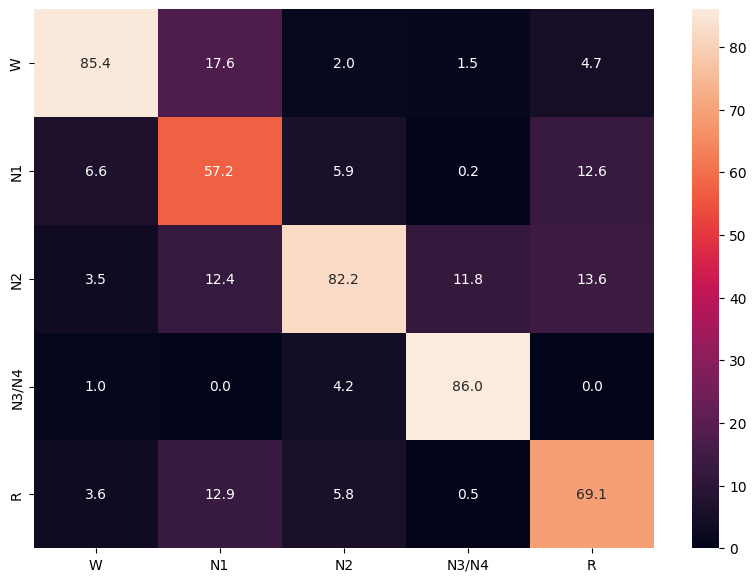

,precision,recall,f1-score
accuracy,0.804438,0.804438,0.804438
macro avg,0.759607,0.713809,0.721266
weighted avg,0.793226,0.804438,0.791848


,precision,recall,f1-score
Sleep stage W,0.853596,0.911212,0.881464
Sleep stage 1,0.571685,0.228838,0.326844
Sleep stage 2,0.821760,0.877436,0.848686
Sleep stage 3/4,0.859988,0.805540,0.831874
Sleep stage R,0.691007,0.746019,0.717460


In [25]:
# plot_confusion_matrix(model,X_test,y_test)

df_cm = pd.DataFrame(confusion_matrix(y_test, yhat,normalize='pred'), index = ['W','N1','N2','N3/N4','R'],
                  columns = ['W','N1','N2','N3/N4','R'])

df_cm=df_cm*100

plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt=".1f")
plt.show()

clf_report=classification_report(y_test, yhat, target_names=event_id.keys(),output_dict=True)

clf_report_classes=pd.DataFrame(clf_report).iloc[:-1, :].T.iloc[:-3]
clf_report_total=pd.DataFrame(clf_report).iloc[:-1, :].T.iloc[-3:]


display(clf_report_total)
display(clf_report_classes)

In [ ]:
model.predict([[1.13978444e+00, 1.15084737e+00, 5.01683075e-02, 5.01683075e-02,
        5.42001030e-01, 1.93290657e-01, 1.00629423e-01, 1.46786705e-01,
        5.59293215e-01, 3.13950484e-04, 3.05555660e+03]])

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


array([1])

## SVM

### Selección de features

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

model=SVC(kernel='rbf')

rfe = RFE(model, 6)
fit = rfe.fit(X_train, y_train)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Train set: (66883, 16) (66883,)
Test set: (16721, 16) (16721,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
features_selected=[]
for i in range(len(fit.support_)):
  if(fit.support_[i]):
    features_selected.append(features[i])
features_selected

In [ ]:
X2=df[features_final].values
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

# sm = SMOTE(random_state=42)
# X_train, y_train = sm.fit_resample(X_train, y_train)

# under_sampler = RandomUnderSampler(random_state=42,replacement=True)
# X_res, y_res = under_sampler.fit_resample(X_train, y_train)

print(f"Before under sampling target statistics: {Counter(y_train)}")
# print(f"After under sampling target statistics: {Counter(y_res)}")

model = SVC(kernel='poly')

model.fit(X_train,y_train)

yhat = model.predict(X_test)

Train set: (66883, 11) (66883,)
Test set: (16721, 11) (16721,)
Before under sampling target statistics: Counter({3: 26438, 1: 17532, 5: 10495, 4: 6739, 2: 5679})


## Guardar el modelo

In [ ]:
dump(clf, 'SVM.joblib') 

### Métricas

In [ ]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.39584049758533557
Test set Accuracy:  0.39118473775491897


### Matriz de confusión

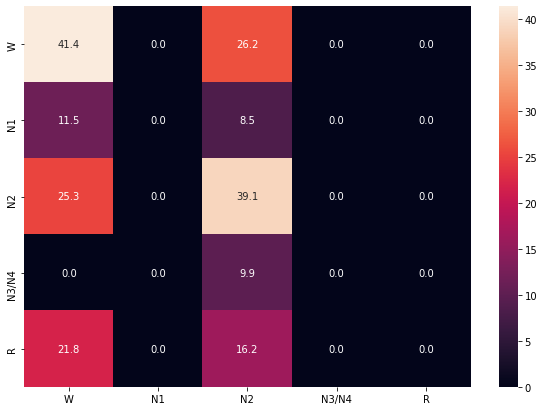

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score
accuracy,0.391185,0.391185,0.391185
macro avg,0.160972,0.200962,0.115553
weighted avg,0.261563,0.391185,0.223489


,precision,recall,f1-score
Sleep stage W,0.413793,0.008180,0.016043
Sleep stage 1,0.000000,0.000000,0.000000
Sleep stage 2,0.391066,0.996629,0.561720
Sleep stage 3/4,0.000000,0.000000,0.000000
Sleep stage R,0.000000,0.000000,0.000000


In [ ]:
# plot_confusion_matrix(model,X_test,y_test)

df_cm = pd.DataFrame(confusion_matrix(y_test, yhat,normalize='pred'), index = ['W','N1','N2','N3/N4','R'],
                  columns = ['W','N1','N2','N3/N4','R'])

df_cm=df_cm*100

plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt=".1f")
plt.show()

clf_report=classification_report(y_test, yhat, target_names=event_id.keys(),output_dict=True)

clf_report_classes=pd.DataFrame(clf_report).iloc[:-1, :].T.iloc[:-3]
clf_report_total=pd.DataFrame(clf_report).iloc[:-1, :].T.iloc[-3:]


display(clf_report_total)
display(clf_report_classes)

# Analisis de impacto de pulsos binaurales en sueño

In [32]:
# Se leen las características de cada una de las noches del
# sujeto de prueba a analizar
temp = pd.read_csv('0201_carac.csv')
temp2 = pd.read_csv('0202_carac.csv')
temp3 = pd.read_csv('0203_carac.csv')
temp.dropna(inplace=True,ignore_index=True)
temp2.dropna(inplace=True,ignore_index=True)
temp3.dropna(inplace=True,ignore_index=True)
features_final=[
 'HFD',
 'SVD Entropy',
 'PFD',
 'Power Delta',
 'Power Theta',
 'Power Beta',
 'Power Delta Normalized',
 'Power Theta Normalized',
 'Power Alpha Normalized',
 'Power Beta Normalized',
 'Hjorth Mobility',
 ]
X_pred = temp[features_final].values
X_pred2 = temp2[features_final].values
X_pred3 = temp3[features_final].values

In [33]:
# Se realiza la predicción de cada una de las epócas y se cambia
# la condición numérica por texto.
prediction = model.predict(X_pred)
prediction2 = model.predict(X_pred2)
prediction3 = model.predict(X_pred3)

event_id = {1 : 'Sleep stage W',
            2 : 'Sleep stage 1',
            3 : 'Sleep stage 2',
            4 : 'Sleep stage 3/4',
            5 : 'Sleep stage R'}

prediction_e = []
prediction_e2 = []
prediction_e3 = []
for i in range(len(prediction)):
    prediction_e.append(event_id[prediction[i]])

for i in range(len(prediction2)):
    prediction_e2.append(event_id[prediction2[i]])

for i in range(len(prediction3)):
    prediction_e3.append(event_id[prediction3[i]])


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 190 out of 190 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 190 out of 190 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 190 out of 190 | elapsed:    0.0s finished


# Gráfico de calidad de sueño

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


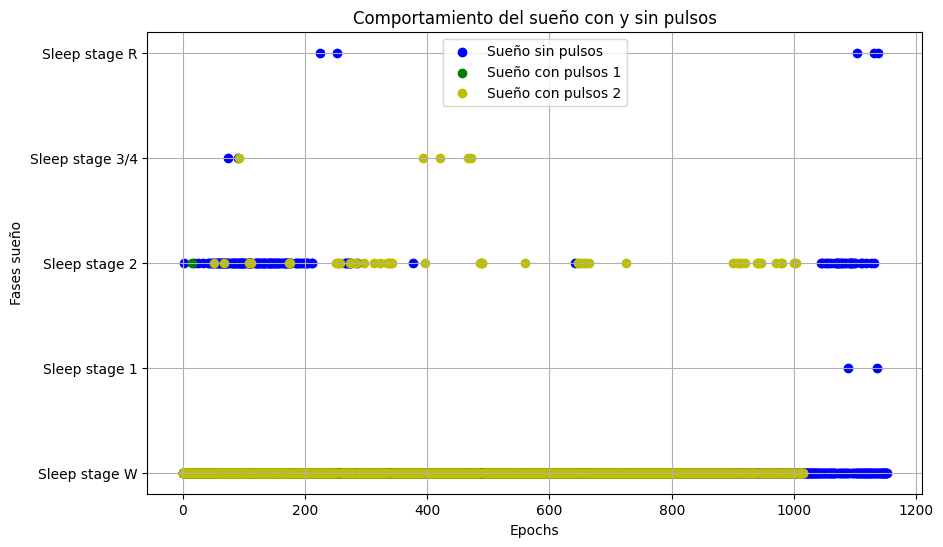

In [35]:
# outputs = ['Sleep stage W', 'Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3/4', 'Sleep stage R']
# order = np.array(outputs)
# outputs_ordered = np.searchsorted(order, prediction_e)
# plt.scatter(np.arange(0,temp.shape[0]),outputs_ordered)
# plt.yticks(np.arange(order.size), order)
# plt.show()

epochs = np.arange(0, temp.shape[0])
epochs2 = np.arange(0, temp2.shape[0])
epochs3 = np.arange(0, temp3.shape[0])
plt.figure(figsize=(10, 6))
plt.scatter(epochs, prediction, color='b', label='Sueño sin pulsos')
plt.scatter(epochs2, prediction2, color='g', label='Sueño con pulsos 1')
plt.scatter(epochs3, prediction3, color='y', label='Sueño con pulsos 2')
plt.yticks([1,2,3,4,5],['Sleep stage W', 'Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3/4', 'Sleep stage R'])
plt.xlabel('Epochs')
plt.ylabel('Fases sueño')
plt.title('Comportamiento del sueño con y sin pulsos')
plt.legend()
plt.grid()
plt.savefig('comportamiento_sueno_sujeto2.eps',format='eps')
plt.show()

In [64]:
# Se contabiliza la cantidad de épocas en cada una de las
# fase de sueño.
variable = prediction3
count1 = np.count_nonzero(variable==1)
count2 = np.count_nonzero(variable==2)
count3 = np.count_nonzero(variable==3)
count4 = np.count_nonzero(variable==4)
count5 = np.count_nonzero(variable==5)
print ('Cantidad de estado despierto: %i' % count1)
print ('Cantidad de estado N1: %i' % count2)
print ('Cantidad de estado N2: %i' % count3)
print ('Cantidad de estado N3/N4: %i' % count4)
print ('Cantidad de estado REM: %i' % count5)


Cantidad de estado despierto: 962
Cantidad de estado N1: 0
Cantidad de estado N2: 49
Cantidad de estado N3/N4: 5
Cantidad de estado REM: 0


### Código para KFolds (Deprecated)

In [ ]:
kf = KFold(n_splits=8,shuffle=True)

x_train,x_test,y_train,y_test=[],[],[],[]

acc_score = []

# for i in epochs_train:
#   y.append(i)

y_pred=[]

# pipe = make_pipeline(FunctionTransformer(eeg_power_band, validate=False),
#                      RandomForestClassifier(n_estimators=100, random_state=42))
# 

pipe=RandomForestClassifier(n_estimators=100, random_state=42,)

pipe2=XGBClassifier()

sm = RandomUnderSampler(random_state=42,replacement=True)

for train, test in kf.split(df[features_final].values):
  print(train,test)
  x_train.append(X[train])
  x_test.append(X[test])
  # print(train)
  y_train.append(np.array(y)[train])
  y_test.append(np.array(y)[test])

  # for i,j,k in zip(range(len(X)),train,test):
  #   x_train.append(X[j])
  #   x_test.append(X[k])
  #   y_train.append(y[j])
  #   y_test.append(y[k])

for m,n,o in zip(x_train,y_train,x_test):

  
  m, n = sm.fit_resample(m,n)

  pipe2.fit(m,n)
  y_pred.append(pipe2.predict(o))
for g,h in zip(y_pred,y_test):
  acc = accuracy_score(g , h)
  print(acc)
  acc_score.append(acc)

print('accuracy of each fold - {}'.format(acc_score))

[    0     1     3 ... 83600 83601 83602] [    2     9    26 ... 83584 83587 83603]
[    0     1     2 ... 83599 83602 83603] [   10    11    13 ... 83592 83600 83601]
[    0     1     2 ... 83601 83602 83603] [    4     7    15 ... 83581 83582 83591]
[    0     1     2 ... 83601 83602 83603] [   20    24    28 ... 83565 83568 83590]
[    1     2     4 ... 83600 83601 83603] [    0     3    12 ... 83597 83598 83602]
[    0     1     2 ... 83601 83602 83603] [   16    22    35 ... 83566 83577 83589]
[    0     1     2 ... 83601 83602 83603] [    5     6    31 ... 83586 83593 83596]
[    0     2     3 ... 83601 83602 83603] [    1     8    21 ... 83588 83594 83599]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

0.7071093675246388
0.7109367524638791
0.709692852358626
0.7051956750550187
0.6988516746411483
0.7029665071770335
0.709377990430622
0.7110047846889952
accuracy of each fold - [0.7071093675246388, 0.7109367524638791, 0.709692852358626, 0.7051956750550187, 0.6988516746411483, 0.7029665071770335, 0.709377990430622, 0.7110047846889952]


In [ ]:
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# from numpy import mean
# from numpy import std
# kf = KFold(n_splits=3,shuffle=True)
# x_train,x_test,y_train,y_test=[],[],[],[]
# acc_score = []

# y=df.condition.tolist()

# y_pred=[]
# # pipe = make_pipeline(FunctionTransformer(eeg_power_band, validate=False),
# #                      RandomForestClassifier(n_estimators=100, random_state=42))
# pipe = make_pipeline(XGBClassifier())

# # sm = SMOTE(random_state=42)
# # X_res, y_res = sm.fit_resample(X_train, y_train)



# # XGBClassifier

# for train, test in kf.split(X):
#   print(train,test)
#   for i,j,k in zip(range(len(X)),train,test):
#     x_train.append(X[j])
#     x_test.append(X[k])
#     y_train.append(y[j])
#     y_test.append(y[k])
# for m,n,o in zip(x_train,y_train,x_test):
#   pipe.fit(m,n)
#   y_pred.append(pipe.predict(o))
# for g,h in zip(y_pred,y_test):
#   acc = accuracy_score(g , h)
#   print(acc)
#   acc_score.append(acc)

# print('accuracy of each fold - {}'.format(acc_score))